# Практическое задание 3


Импорт необходимых библиотек

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


В первую очередь необходимо сгенерировать данные для последующей кластеризации. Для этого будем использовать функцию make_blobs из библиотеки sklearn. В параметрах функции укажем общее количество точек - "n_samples", количество центров, которые нужно сгенерировать - "centers", количество признаков для каждого образца - "n_features", ограничивающая рамка для кластеров - "center_box". После генерации визуализируем данные при помощи функции scatter. На графике представлены сгенерированные нами данные. Визуально видно, что их можно разделить на два кластера. 

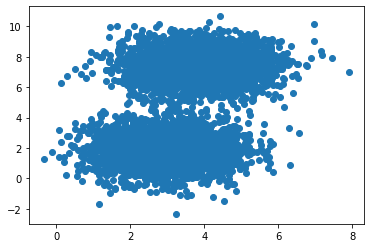

In [19]:
x = make_blobs(n_samples=5000, centers=2, n_features=2, center_box=(0,8))
plt.scatter(x[0][:,0],x[0][:,1], label='True Position')


Для кластеризации будем использовать алгоритм к-средних. Воспользуемся для этого классом KMeans из библиотеки sklearn. При инициализации зададим количество кластеров, на которые необходимо разделить данные. После инициализации выполним кластеризацию данных, воспользовавшись функцией fit. В нее отправляем сгенерированные данные.

In [21]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x[0])

KMeans(n_clusters=2)

После кластеризиции визуализируем ее результат. Для этого снава воспользуемся функцией scatter. На графике видно, что данные были разделены на два кластера, один из которых представлен точками красного цвета, другой - сиреневого. Также на график черным цветом нанесены центры полученных кластеров.

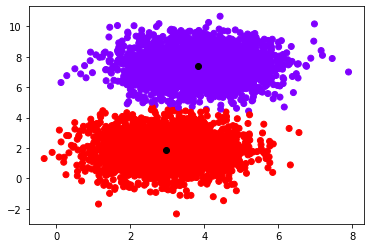

In [22]:
plt.scatter(x[0][:,0],x[0][:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

Для того, чтобы повторить кластеризацию с использованием различных метрик, нужно написать свою функцию кластеризации, так как в функции из библиотеки sklearn не предусмотрена возможность использовать разные метрики для рассчета расстояний. Создадим функцию find_clusters, в которой по умолчанию укажем метрику евклидова расстояния. В ней первоначально выберем центры кластеров случайным образом и далее будем находить новые центры по алгоритму k-средних до тех пор, пока новые центры кластеров не совпадут с ранее найденными.

In [23]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X_data, n_clusters, rseed=2, metric_use='euclidean'):
    
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X_data.shape[0])[:n_clusters]
    centers=X_data[i]
    while True:
        labels=pairwise_distances_argmin(X_data,centers, metric=metric_use )
        new_centers = np.array([X_data[labels==i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers=new_centers
    return centers, labels

Сперва запустим написанную функцию по умолчанию, с евклидовым расстоянием, и визуализируем результат. По прежнему центры кластеров обозначим черным цветом, а сами точки разными цветами в зависимости от принадлежности к одному или другому кластеру. Если сравнить полученный на этом этапе и предыдущий график, видно, что результат не изменился. Из этого можно заключить, что написанная нами функция работает корректно, так как метрики расстояния у библиотечной и нашей функции одинаковы.

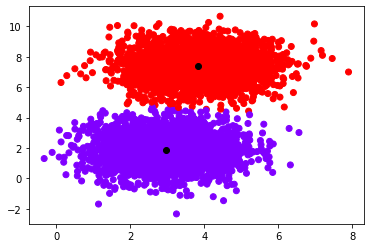

In [25]:
centers, labels = find_clusters(x[0],2)
plt.scatter(x[0][:,0],x[0][:,1], c=labels, cmap='rainbow')
plt.scatter(centers[:,0] ,centers[:,1], color='black')


Затем теперь используем расстояние Манхэттена, передав соответствующую переменную в написанную функцию кластеризации. По-прежнему визуализируем полученный результат на графике. Из сравнения графиков видно, что точки распределились по кластерам несколько иначе, чем в прошлый раз(особенно хорошо это видно в приграничных зонах), следовательно, использование различных метрик влияет на результат.

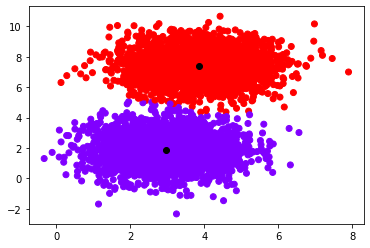

In [26]:
centers, labels = find_clusters(x[0],2,metric_use='manhattan')
plt.scatter(x[0][:,0],x[0][:,1], c=labels, cmap='rainbow')
plt.scatter(centers[:,0] ,centers[:,1], color='black')

Теперь используем расстояние Чебышева, передав соответствующую переменную в написанную функцию кластеризации. По-прежнему визуализируем полученный результат на графике. Снова в пограничных точках можно видеть, что полученный результат отличается от предыдущих.

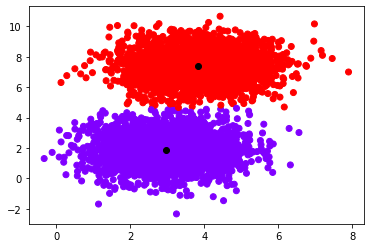

In [27]:
centers, labels = find_clusters(x[0],2,metric_use='chebyshev')
plt.scatter(x[0][:,0],x[0][:,1], c=labels, cmap='rainbow')
plt.scatter(centers[:,0] ,centers[:,1], color='black')

Таким образом, был сгенерирован набор данных и проведена кластеризация различными способами:
при помощи функции из библиотеки sklearn с использованием евклидова расстояния, а также при помощи самописной функции с использованием различных метрик(расстояние Чебышева, евклидово расстояние, расстояние Манхэттена). Полученные результаты свидетельствуют о том, что выбор метрики влияет на полученный результат. 